# 2変数間の記述統計

## 共分散

散布図にした時のばらつき<br>

$s_{xy} = \frac{1}{n}Σ^{n}_{i=1}(x_{i} - \bar{x})(y_{i} - \bar{y})$

In [34]:
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [9]:
# biasをTrueにすると共分散、Falseにすると不偏共分散を返す（デフォルトはFalse）
np.cov(df['total_bill'],df['tip'], bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [10]:
np.var(df['total_bill'])

78.92813148851113

In [15]:
x = np.stack([df['total_bill'],df['tip'], df['size']],axis=0)
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

In [19]:
# 不偏共分散となる
df.cov()

,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730


#### どれくらい相関が強いのかは共分散を見ただけではわからない(尺度が違う)ので、相関係数を計算する必要がある！

## 相関係数

共分散を標準化したのが相関係数<br>
$(相関係数)=\frac{(xとyの共分散)}{(xの標準偏差)⋅(yの標準偏差)}$<br>

なぜxの標準偏差とyの標準偏差の積で割るのか？<br>
無次元化(単位を消す)するため
$\frac{(𝑘𝑔×𝑚)^2}{(𝑘𝑔×𝑚)(𝑘𝑔×𝑚)}=1$<br>

なぜ標準偏差で割るのかといえば無次元化に都合のいい値だったから

共分散<br>
$S_{xy} = \frac{1}{n}Σ^{n}_{i=1}(x_{i} - \bar{x})(y_{i} - \bar{y})$<br>

共分散の取りうる値<br>
$-s_{x}s_{y} ≦ s_{xy} ≦ s_{x}s_{y}$

正の相関が最大の時、yはxを用いて直線で表すことができる<br>
$y_{i} = ax_{i} + b$<br>

$\bar{y} = a\bar{x} + b$<br>

$S_{xy} = \frac{1}{n}Σ^{n}_{i=1}(x_{i} - \bar{x})(ax_{i} + b - (a\bar{x} + b))$<br>

　　  = $\frac{1}{n}Σ^{n}_{i=1}(x_{i} - \bar{x})(ax_{i} - a\bar{x})$<br>
　　  = $a\frac{1}{n}Σ^{n}_{i=1}(x_{i} - \bar{x})(x_{i} - \bar{x})$<br>
　　  = a * 「$\frac{1}{n}Σ^{n}_{i=1}(x_{i} - \bar{x})^2$」 = 分散の式<br>
　　  = $as_{x}^2$

y = ax + b のとき<br>
yの標準偏差($s_y$)はxの標準偏差($s_x$)にaを掛けたもの($as_{x}$)になる<br>

$s_y = as_x$<br>

$a = \frac{s_y}{s_x}$<br>

$as_x^2 = \frac{s_y}{s_x}s_x^2$<br>

$= s_{x}s_{y}$

In [22]:
np.corrcoef(df['total_bill'],df['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [26]:
# 相関係数を見れば単純に比較ができる
x = np.stack([df['total_bill'],df['tip'], df['size']],axis=0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [27]:
df.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


<AxesSubplot:>

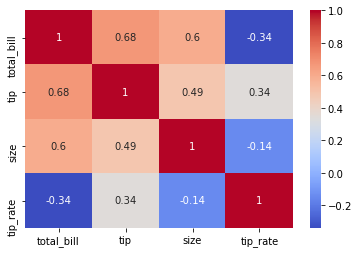

In [32]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

### 連関

カテゴリ変数間の相関関係<br>
期待度数 = 連関がなかった場合の度数<br>

期待度数からどれくらい離れているかで連関があるかどうかを判断する

### カイ二乗

観測度数が期待度数からどれくらい離れているかを計算した値<br>
二乗しているため、結果の値を比較してもどちらが連関が強いかわからない<br>
→標準化する必要がある

$χ^2 = Σ^a_{i=1}Σ^b_{i=1}\frac{(観測度数_{ij} - 期待度数_{ij})^2}{期待度数_{ij}}$

In [42]:
pd.crosstab(df['sex'], df['time'])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [43]:
cont_table = pd.crosstab(df['sex'], df['time'])
# contingency 分割表
# chi2 χ二乗
stats.chi2_contingency(cont_table, correction=False)

# 第一戻り値：χ2
# 第四戻り値：期待度数の分割表

(10.277251918677742,
 0.0013468039268008766,
 1,
 array([[ 43.75409836, 113.24590164],
        [ 24.24590164,  62.75409836]]))

### クラメールの連関関数

連関の強さを表す指標<br>
χ2値を0~1に標準化した値

$V = \sqrt{\frac{χ^2}{(min(a,b) - 1N)}}$

※min(a, b)は行数a, 列数bのうち小さい方<br>

$χ^2 = 24.11$<br>
a = 2, b = 2, min(a, b) = 2 (2行2列なので小さい方(今回は同じなので2)を返す)<br>
N = 100<br>

In [77]:
def cramers_v(x, y):
    cont_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(cont_table, correction=False)[0]
    min_d = min(cont_table.shape) -1
    n = len(x)
    v = np.sqrt(chi2 / (min_d * N))
    return v

In [78]:
cramale_calc(x=df['sex'], y=df['time'])

0.20523129613344476